# Final Project - COVID-19 in New York City

### After having gone through having COVID-19, I wanted to do my final project on datasets that delt with this Virus.

In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#import folium

### Datasets URL's

In [5]:
zipcode = 'https://raw.githubusercontent.com/nychealth/coronavirus-data/master/tests-by-zcta.csv'
boro = 'https://raw.githubusercontent.com/nychealth/coronavirus-data/master/boro.csv'
age = 'https://raw.githubusercontent.com/nychealth/coronavirus-data/master/by-age.csv'
sex = 'https://raw.githubusercontent.com/nychealth/coronavirus-data/master/by-sex.csv'
cases = 'https://raw.githubusercontent.com/nychealth/coronavirus-data/master/case-hosp-death.csv'
tests = 'https://raw.githubusercontent.com/nychealth/coronavirus-data/master/tests.csv'
syndrome = 'https://raw.githubusercontent.com/nychealth/coronavirus-data/master/syndromic_data.csv'

### Create pandas Datasets

In [6]:
originalZipcode = pd.read_csv(zipcode)
pdZipcode = originalZipcode.copy()

originalBoro = pd.read_csv(boro)
pdBoro = originalBoro.copy()

originalAge = pd.read_csv(age)
pdAge = originalAge.copy()

originalSex = pd.read_csv(sex)
pdSex = originalSex.copy()

originalCases = pd.read_csv(cases)
pdCases = originalCases.copy()

originalTests = pd.read_csv(tests)
pdTests = originalTests.copy()

originalSyndrome = pd.read_csv(syndrome)
pdSyndrome = originalSyndrome.copy()

### Change any NaN values to 0

In [7]:
pdZipcode.fillna(0, inplace=True)

### Sort and change default column names.

In [9]:
pdZipcode = pdZipcode.sort_values(by = 'MODZCTA').rename(columns={'MODZCTA':'Zipcode', 'zcta_cum.perc_pos':'Percent Positive'})
#pdZipcode.sort_values(by='Percent Positive', ascending=False)

KeyError: 'MODZCTA'

In [10]:
pdZipcode['Zipcode'] = pdZipcode['Zipcode'].astype(int)
pdZipcode.dtypes

KeyError: 'Zipcode'

## Map of current COVID-19 Positive Cases in NYC. 

In [11]:
positiveMap = folium.Map(location=[40.7137859, -73.9367536], default_zoom_start=1)
nycZipcode = 'https://raw.githubusercontent.com/nychealth/coronavirus-data/master/Geography-resources/MODZCTA_2010_WGS1984.geo.json'
pdZipcode['Zipcode']=pdZipcode['Zipcode'].astype(str)
positiveMap.choropleth(geo_data=nycZipcode,
                       data=pdZipcode,
                       columns=['Zipcode', 'Positive'],
                       key_on='feature.properties.MODZCTA',
                       fill_color='OrRd',
                       fill_opacity=.7, 
                       line_opacity=.2,
                       legend_name='Positive Cases by Zip Code')
positiveMap

NameError: name 'folium' is not defined

## Cases, Hospitilization and Death Rates by Sex.

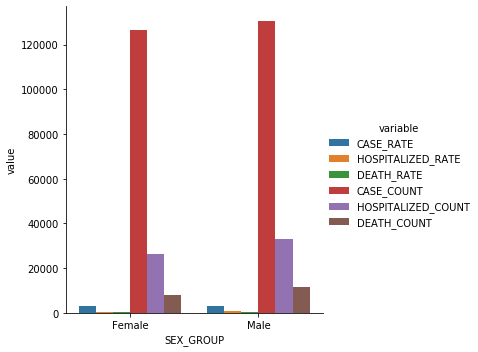

In [12]:
pdSex = pdSex.drop(2)
pdSexMelt= pdSex.melt('SEX_GROUP')
plotSex = sns.catplot(x="SEX_GROUP", y='value', hue='variable', kind='bar', data=pdSexMelt)

## Cases, Hospitilization and Death Rates by Age.

In [13]:
#pdAge

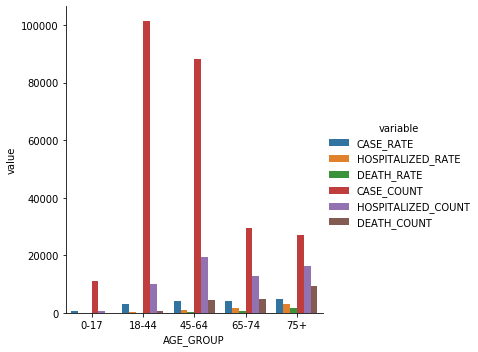

In [14]:
pdAge = pdAge.drop(5)
pdAgeMelt= pdAge.melt('AGE_GROUP')
plotAge = sns.catplot(x="AGE_GROUP", y='value', hue='variable', kind='bar', data=pdAgeMelt)

## Cases, Hospitilization and Death Count by Day.

In [15]:
#pdCases

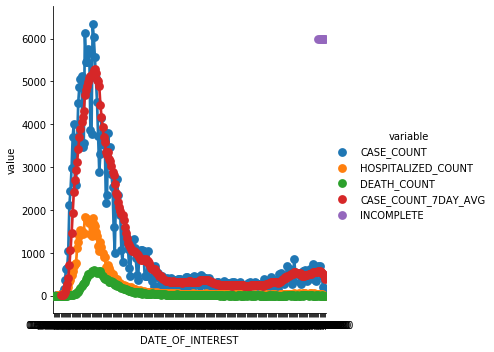

In [16]:
pdCasesMelt= pdCases.melt('DATE_OF_INTEREST')
plotCases = sns.catplot(x="DATE_OF_INTEREST", y='value', hue='variable', kind='point', data=pdCasesMelt)

## Case Count and Case Rate by Boro.

In [193]:
pdBoro

,BOROUGH_GROUP,COVID_CASE_COUNT,COVID_CASE_RATE
0,The Bronx,43252,2940.87
1,Brooklyn,51931,1916.16
2,Manhattan,23620,1258.37
3,Queens,58574,2346.37
4,Staten Island,12937,2572.39
5,Citywide,190408,NaN


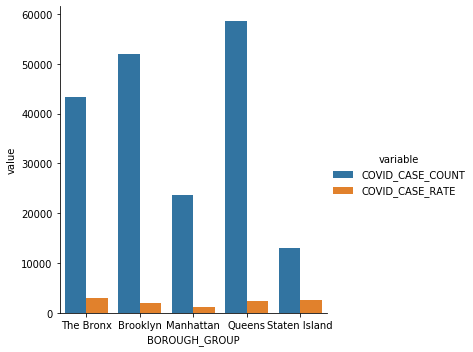

In [194]:
pdBoro = pdBoro.drop(5)
pdBoroMelt= pdBoro.melt('BOROUGH_GROUP')
plotBoro = sns.catplot(x="BOROUGH_GROUP", y='value', hue='variable', kind='bar', data=pdBoroMelt)

## Confirmed and Probable Cases by Day.

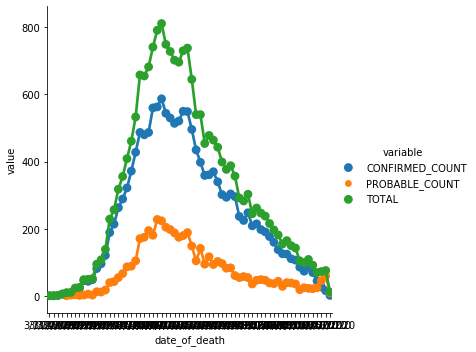

In [195]:
pdProbableMelt= pdProbable.melt('date_of_death')
plotProbable = sns.catplot(x="date_of_death", y='value', hue='variable', kind='point', data=pdProbableMelt)

## Confirmed, Probable and Total Cases by Day.

In [196]:
pdTests

,DATE,TOTAL_TESTS,POSITIVE_TESTS,PERCENT_POSITIVE,PERCENT_POSITIVE_3DAYS_AGG
0,03/03/2020,13,1,0.08,NaN
1,03/04/2020,32,5,0.16,NaN
2,03/05/2020,65,4,0.06,0.09
3,03/06/2020,83,7,0.08,0.09
4,03/07/2020,66,8,0.12,0.09
...,...,...,...,...,...
69,05/11/2020,17934,1988,0.11,0.12
70,05/12/2020,19624,2061,0.11,0.11
71,05/13/2020,19517,1991,0.10,0.11
72,05/14/2020,15426,1530,0.10,0.10


In [197]:
#pdProbable['TOTAL'] = pdProbable.sum(axis=1)

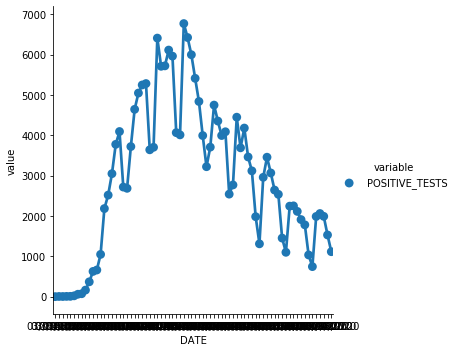

In [202]:
pdTestPositive = pdTests.drop(['TOTAL_TESTS', 'PERCENT_POSITIVE', 'PERCENT_POSITIVE_3DAYS_AGG'], axis=1)
pdTestPositiveMelt= pdTestPositive.melt('DATE')
plotTestPositive = sns.catplot(x="DATE", y='value', hue='variable', kind='point', data=pdTestPositiveMelt)

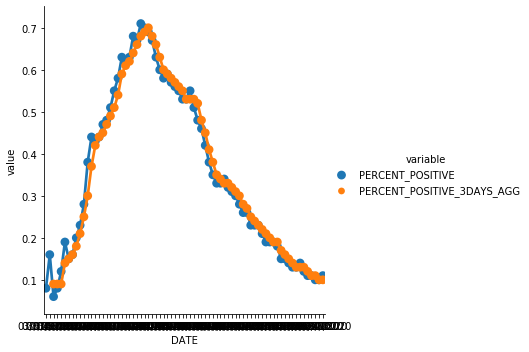

In [200]:
pdTest = pdTests.drop(['TOTAL_TESTS', 'POSITIVE_TESTS'], axis=1)
pdTestMelt= pdTest.melt('DATE')
plotTest = sns.catplot(x="DATE", y='value', hue='variable', kind='point', data=pdTestMelt)